In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# load raw data
data=pd.read_excel('data-indoor.xlsx', engine='openpyxl')
data.shape

(128, 18)

In [3]:
data.head()

,Donor,Acceptor,Light source,Condition,Voc (V),Jsc (mA cm^2),FF(%),PCE(%),SMILES(donor),SMILES(acceptor),Donor_HOMO(ev),Donor_LUMO(ev),Donor_bandgap(ev),Acceptor_HOMO(ev),Acceptor_LUMO(ev),Acceptor_bandgap(ev),EffectiveEg(eV),Reference
0,P3HT,PC61BM,FL,300,0.410,0.0206,56.6,5.80,CC1=CC(CCCCCC)=C(C)S1,COC(=O)CCCC1(C23C14C5=C6C7=C8C5=C9C1=C5C%10=C%...,5.20,3.20,2.00,6.1,3.7,2.4,1.50,https://doi.org/10.1063/1.4954268
1,PCDTBT,PC71BM,FL,300,0.720,0.0277,69.3,16.60,CC1=CC(N(C(CCCCCCCC)CCCCCCCC)C2=C3C=CC(C4=CC=C...,COC(=O)CCCC1(C23C14C5=C6C7=C8C9=C1C%10=C%11C9=...,5.40,3.60,1.80,6.1,4.2,1.9,1.20,https://doi.org/10.1063/1.4954268
2,PTB7,PC71BM,FL,300,0.610,0.0286,69.5,14.60,CC1=C(C(F)=C(C(OCC(CC)CCCC)=O)S2)C2=C(C3=CC4=C...,COC(=O)CCCC1(C23C14C5=C6C7=C8C9=C1C%10=C%11C9=...,5.15,3.31,1.80,6.1,4.2,1.9,0.95,https://doi.org/10.1063/1.4954268
3,PCDTBT,PC71BM,LED,300,0.737,0.0311,63.4,18.72,CC1=CC(N(C(CCCCCCCC)CCCCCCCC)C2=C3C=CC(C4=CC=C...,COC(=O)CCCC1(C23C14C5=C6C7=C8C9=C1C%10=C%11C9=...,5.40,3.60,1.80,6.1,4.2,1.9,1.20,https://doi.org/10.1039/C8TC02838A
4,PTB7-Th(PCE10),PC71BM,LED,890,0.620,0.0920,74.0,11.63,O=C(OCC(CC)CCCC)C1=C(F)C2=C(C)SC(C3=CC4=C(C(C5...,COC(=O)CCCC1(C23C14C5=C6C7=C8C9=C1C%10=C%11C9=...,5.24,3.66,1.58,6.1,4.2,1.9,1.04,http://dx.doi.org/10.7567/JJAP.54.071602


In [4]:
data.describe()

,Voc (V),Jsc (mA cm^2),FF(%),PCE(%),Donor_HOMO(ev),Donor_LUMO(ev),Donor_bandgap(ev),Acceptor_HOMO(ev),Acceptor_LUMO(ev),Acceptor_bandgap(ev),EffectiveEg(eV)
count,127.000000,127.000000,127.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,0.741071,0.083938,65.353307,17.274141,5.383594,3.432187,1.949922,5.806172,3.907891,1.902500,1.475703
std,0.182888,0.055100,10.636156,6.813819,0.130678,0.291204,0.282674,0.228518,0.248367,0.255195,0.271704
min,0.290000,0.019000,30.900000,3.500000,5.130000,2.910000,1.580000,5.330000,3.420000,1.500000,0.950000
25%,0.620000,0.042150,59.000000,12.475000,5.272500,3.200000,1.790000,5.640000,3.700000,1.770000,1.307500
50%,0.720000,0.068500,67.200000,16.800000,5.430000,3.600000,1.820000,5.790000,3.900000,1.900000,1.470000
75%,0.840000,0.110450,73.050000,22.000000,5.450000,3.652500,2.052500,6.100000,4.140000,2.012500,1.712500
max,1.140000,0.245000,81.100000,36.300000,5.660000,3.800000,2.560000,6.100000,4.300000,2.400000,2.010000


## ML Models - Data Preprocessing

In [5]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [6]:
#prepressing data for training: donors
x_data_D = np.array(data.loc[:,'SMILES(donor)'])
smileD=[]
for i in x_data_D:
    mole=Chem.MolFromSmiles(i)
    smileD.append(mole)

#prepressing data for training: acceptors
x_data_A = np.array(data.loc[:,'SMILES(acceptor)'])
smileA=[]
for i in x_data_A:
    mole=Chem.MolFromSmiles(i)
    smileA.append(mole)

print(len(smileD), len(smileA))

128 128


128


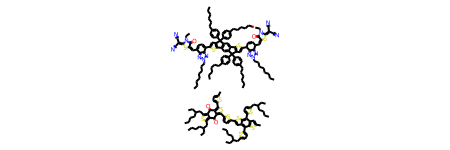

In [7]:
#combine SMILES of donor and acceptor range
merge_smile=[]
for i in range(data.shape[0]):
    combo = Chem.CombineMols(smileD[i],smileA[i])
    mmm=Chem.MolToSmiles(combo)
    mole_merge=Chem.MolFromSmiles(mmm)
    merge_smile.append(mole_merge)

print(len(merge_smile))
merge_smile[5]

In [8]:
# y_data processing
y_data=np.around(np.array(data.loc[:,'PCE(%)']),decimals=2)
print(y_data.shape, y_data[:5])

(128,) [ 5.8  16.6  14.6  18.72 11.63]


## ML Model - Modelling

In [9]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

In [10]:
#Generate fingerprints
fpt_Morgan = [AllChem.GetMorganFingerprintAsBitVect(p, 5) for p in merge_smile]# Generate fingerprints: Morgan fingerprint with radius 5    

morgan= []
for i in fpt_Morgan:
    arr = np.zeros((1,))  # create a num array to accept the data
    DataStructs.ConvertToNumpyArray(i, arr)
    morgan.append(arr)    # this will change numpy array to list 
    
x_data_Morgan = np.array(morgan) # change list to np array

print(x_data_Morgan.shape)

(128, 2048)


In [11]:
#create KFold validation 
k = 10
kf=KFold(n_splits=k, shuffle=True, random_state=2)

In [12]:
# SVR parameters
SVR_cross_Corrcoef = []
SVR_cross_RSE = []
SVR_cross_RMSE = []
SVR_R2 = []
SVR_MAPE = []

for train_index, test_index in kf.split(x_data_Morgan):
    x_train, x_test = x_data_Morgan[train_index], x_data_Morgan[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    
    model_svm_cross = SVR(C=10, gamma=0.015)
    model_svm_cross.fit(x_train, y_train)
    test_svm_cross = model_svm_cross.predict(x_test)
    
    SVR_cross_Corrcoef.append(np.corrcoef(y_test, test_svm_cross)[0,1])
    SVR_cross_RSE.append(mean_squared_error(y_test, test_svm_cross))
    SVR_cross_RMSE.append(np.sqrt(mean_squared_error(y_test, test_svm_cross)))
    SVR_R2.append(r2_score(y_test, test_svm_cross))
    SVR_MAPE.append(mean_absolute_percentage_error(y_test, test_svm_cross))
    
print('Cross-Predicted Correlated Coef: ', SVR_cross_Corrcoef, np.mean(SVR_cross_Corrcoef))
print('Cross-Predicted mean_squared_error: ', SVR_cross_RSE, np.mean(SVR_cross_RSE))
print('Cross-Predicted root_mean_squared_error: ', SVR_cross_RMSE, np.mean(SVR_cross_RMSE))
print('Cross-Predicted R^2_score:', SVR_R2, np.mean(SVR_R2))
print('Cross-Predicted MAPE:', SVR_MAPE, np.mean(SVR_MAPE))

Cross-Predicted Correlated Coef:  [0.8974610381812109, 0.9038833226822542, 0.8959867939801495, 0.7881073679099411, 0.8472411735858455, 0.6845094606992963, 0.9451902082156213, 0.8969897308436063, 0.8372932402584057, 0.9134707632865315] 0.8610133099642863
Cross-Predicted mean_squared_error:  [5.78184753246865, 12.87118678710206, 12.00381567992137, 25.434319550295097, 4.278284419659593, 45.94130501940232, 3.873262285421572, 9.346836018007052, 29.80812081044812, 12.689035393867917] 16.202801349659374
Cross-Predicted root_mean_squared_error:  [2.4045472614337715, 3.5876436259893567, 3.464652317321519, 5.043244942524118, 2.0684014164710853, 6.7780015505606315, 1.9680605390641752, 3.057259560130126, 5.459681383601805, 3.562167232720541] 3.7393659829817123
Cross-Predicted R^2_score: [0.6193688794220169, 0.7641400645018579, 0.7778040641979471, 0.5508685554721249, 0.7160759786302963, 0.3753726748880045, 0.8572363941298176, 0.7984855065530879, 0.4571703208166601, 0.7766887123256252] 0.66932111509

In [13]:
# RF parameters
RF_cross_Corrcoef = []
RF_cross_RSE = []
RF_cross_RMSE = []
RF_R2 = []
RF_MAPE = []

for train_index, test_index in kf.split(x_data_Morgan):
    x_train, x_test = x_data_Morgan[train_index], x_data_Morgan[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    
    model_rf_cross = RandomForestRegressor(n_estimators=200)
    model_rf_cross.fit(x_train, y_train)
    test_rf_cross = model_rf_cross.predict(x_test)
    
    RF_cross_Corrcoef.append(np.corrcoef(y_test, test_rf_cross)[0,1])
    RF_cross_RSE.append(mean_squared_error(y_test, test_rf_cross))
    RF_cross_RMSE.append(np.sqrt(mean_squared_error(y_test, test_rf_cross)))
    RF_R2.append(r2_score(y_test, test_rf_cross))
    RF_MAPE.append(mean_absolute_percentage_error(y_test, test_rf_cross))
    
print('Cross-Predicted Correlated Coef: ', RF_cross_Corrcoef, np.mean(RF_cross_Corrcoef))
print('Cross-Predicted mean_squared_error: ', RF_cross_RSE, np.mean(RF_cross_RSE))
print('Cross-Predicted root_mean_squared_error: ', RF_cross_RMSE, np.mean(RF_cross_RMSE))
print ('Cross-Predicted R^2_score:', RF_R2, np.mean(RF_R2))
print('Cross-Predicted MAPE:', RF_MAPE, np.mean(RF_MAPE))

Cross-Predicted Correlated Coef:  [0.8606276052253061, 0.8722842448879023, 0.9079728750498064, 0.8926617777198973, 0.8041898399937533, 0.7547171340763885, 0.8573172531614001, 0.8962932256560173, 0.5729071168172958, 0.917680340496304] 0.8336651413084072
Cross-Predicted mean_squared_error:  [6.721248103348383, 13.818791870634929, 12.967410875596565, 13.512464627021613, 6.67406565751716, 43.34357387371812, 8.539654983504292, 9.981814452081487, 46.13464941184049, 14.433161829015207] 17.612683568427823
Cross-Predicted root_mean_squared_error:  [2.5925370013460527, 3.717363564494994, 3.601029141175695, 3.675930443713756, 2.58342130855909, 6.583583664974428, 2.922268807537098, 3.159400964119858, 6.792249215969663, 3.7991001341127095] 3.942688424600334
Cross-Predicted R^2_score: [0.5575261743078469, 0.7467755372382383, 0.7599674910659933, 0.7613904022450791, 0.5570823782401824, 0.4106919557879173, 0.6852389927423539, 0.7847955950958089, 0.1598511996540466, 0.7459942499011701] 0.616931397627863

In [14]:
# KNN parameters
KNN_cross_Corrcoef = []
KNN_cross_RSE = []
KNN_cross_RMSE = []
KNN_R2 = []
KNN_MAPE = []

for train_index, test_index in kf.split(x_data_Morgan):
    x_train, x_test = x_data_Morgan[train_index], x_data_Morgan[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    
    model_knn_cross = KNeighborsRegressor(n_neighbors=3)
    model_knn_cross.fit(x_train, y_train)
    test_knn_cross = model_knn_cross.predict(x_test)
    
    KNN_cross_Corrcoef.append(np.corrcoef(y_test, test_knn_cross)[0,1])
    KNN_cross_RSE.append(mean_squared_error(y_test, test_knn_cross))
    KNN_cross_RMSE.append(np.sqrt(mean_squared_error(y_test, test_knn_cross)))
    KNN_R2.append(r2_score(y_test, test_knn_cross))
    KNN_MAPE.append(mean_absolute_percentage_error(y_test, test_knn_cross))
    
print('Cross-Predicted Correlated Coef: ', KNN_cross_Corrcoef, np.mean(KNN_cross_Corrcoef))
print('Cross-Predicted mean_squared_error: ', KNN_cross_RSE, np.mean(KNN_cross_RSE))
print('Cross-Predicted root_mean_squared_error: ', KNN_cross_RMSE, np.mean(KNN_cross_RMSE))
print ('Cross-Predicted R^2_score:', KNN_R2, np.mean(KNN_R2))
print('Cross-Predicted MAPE:', KNN_MAPE, np.mean(KNN_MAPE))

Cross-Predicted Correlated Coef:  [0.78819854906058, 0.7905130643833383, 0.9339086994157022, 0.6157770821591891, 0.7965347103212023, 0.6833167161616388, 0.7658962270261945, 0.8731857777332134, 0.33832380774742077, 0.8437046316056963] 0.7429359265614176
Cross-Predicted mean_squared_error:  [7.453944444444445, 21.485418803418803, 10.499835897435903, 36.40958632478633, 7.386123076923078, 39.68234957264958, 14.973555555555556, 13.388670940170941, 54.35164629629629, 20.86198425925926] 22.649311517094016
Cross-Predicted root_mean_squared_error:  [2.7301912834899396, 4.6352366502066324, 3.240345027529615, 6.034035658229601, 2.7177422756624803, 6.299392793964318, 3.86956787710922, 3.6590532846859367, 7.372356902395345, 4.567492119233405] 4.512541387250649
Cross-Predicted R^2_score: [0.5092912411331725, 0.606287316240099, 0.8056433949663879, 0.35706201739043875, 0.5098274072908813, 0.46047070588754235, 0.4480934606844096, 0.7113449687960596, 0.010213125821622815, 0.632854947301267] 0.5051088585

In [15]:
# ANN parameters
ANN_cross_Corrcoef = []
ANN_cross_RSE = []
ANN_cross_RMSE = []
ANN_R2 = []
ANN_MAPE = []

for train_index, test_index in kf.split(x_data_Morgan):
    x_train, x_test = x_data_Morgan[train_index], x_data_Morgan[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    
    model_ann_cross = MLPRegressor(hidden_layer_sizes=(100,50,10), activation="relu",
                 solver='adam', alpha=0.0001,
                 batch_size='auto', learning_rate="adaptive",
                 learning_rate_init=0.001,
                 power_t=0.5, max_iter=1000,random_state=2, tol=1e-4)
    model_ann_cross.fit(x_train, y_train)
    test_ann_cross = model_ann_cross.predict(x_test)
    
    ANN_cross_Corrcoef.append(np.corrcoef(y_test, test_ann_cross)[0,1])
    ANN_cross_RSE.append(mean_squared_error(y_test, test_ann_cross))
    ANN_cross_RMSE.append(np.sqrt(mean_squared_error(y_test, test_ann_cross)))
    ANN_R2.append(r2_score(y_test, test_ann_cross))
    ANN_MAPE.append(mean_absolute_percentage_error(y_test, test_ann_cross))
    
print('Cross-Predicted Correlated Coef: ', ANN_cross_Corrcoef, np.mean(ANN_cross_Corrcoef))
print('Cross-Predicted mean_squared_error: ', ANN_cross_RSE, np.mean(ANN_cross_RSE))
print('Cross-Predicted root_mean_squared_error: ', ANN_cross_RMSE, np.mean(ANN_cross_RMSE))
print ('Cross-Predicted R^2_score:', ANN_R2, np.mean(ANN_R2))
print('Cross-Predicted MAPE:', ANN_MAPE, np.mean(KNN_MAPE))

Cross-Predicted Correlated Coef:  [0.8739404174298737, 0.8718461700867126, 0.935283520111514, 0.8382251051355847, 0.8300765507135229, 0.7190734503626128, 0.9225384319962789, 0.7943952687888168, 0.7468670138038123, 0.9372682648402016] 0.846951419326893
Cross-Predicted mean_squared_error:  [9.245367480535432, 14.175247743961718, 8.109467197324058, 17.40462936406508, 6.578817194610723, 51.12218986638854, 7.894170820337442, 20.20369099248701, 34.33634899077033, 9.760700118890405] 17.883062976937076
Cross-Predicted root_mean_squared_error:  [3.0406195882641143, 3.765003020445232, 2.8477126254810297, 4.171885588563651, 2.564920504540194, 7.149978312301971, 2.8096567086278426, 4.494851609618165, 5.859722603568392, 3.124211919651163] 3.982856248106175
Cross-Predicted R^2_score: [0.39135811442455615, 0.7402436097103868, 0.849890176522831, 0.692660685799077, 0.5634034462115891, 0.30493231098629203, 0.7090307320760527, 0.5644155360952767, 0.3747076702515937, 0.8282237818324484] 0.6018866063910104

# new compounds

In [16]:
New_data=pd.read_excel('new-compound.xlsx',engine='openpyxl')
New_data

,Donor,Acceptor,Light source,Condition,Voc (V),Jsc (mA cm^2),FF(%),PCE(%),SMILES(donor),SMILES(acceptor),Donor_HOMO(ev),Donor_LUMO(ev),Donor_bandgap(ev),Acceptor_HOMO(ev),Acceptor_LUMO(ev),Acceptor_bandgap(ev),EffectiveEg(eV),Reference
0,PM7,DTSiC-4F,LED,1000,0.8400,0.09910,0.7278,21.17,Cc1sc(cc1)c1sc(c2C(=O)c3c(C(=O)c12)c(sc3CC(CCC...,Fc1cc2C(=O)\C(=C/c3cc4c(s3)c3cc5c(cc3[Si]4(CCC...,5.58,3.60,1.98,5.86,3.99,1.87,1.59,https://pubs.acs.org/doi/10.1021/acsami.3c02966
1,PM7,DTSiC-2M,LED,1000,0.9900,0.08546,0.6583,19.53,Cc1sc(cc1)c1sc(c2C(=O)c3c(C(=O)c12)c(sc3CC(CCC...,N#C\C(C#N)=C\1/C(=C/c2cc3c(s2)C2C=C4C(=CC2[Si]...,5.58,3.60,1.98,5.75,3.76,1.99,1.82,https://pubs.acs.org/doi/10.1021/acsami.3c02966
2,PM7,DTSiCODe-4F,LED,1000,1.0400,0.08600,0.6415,20.14,Cc1sc(cc1)c1sc(c2C(=O)c3c(C(=O)c12)c(sc3CC(CCC...,CCCCCCCC[Si]1(CCCCCCCC)c2c(sc(\C=C\3/C(=O)c4cc...,5.58,3.60,1.98,5.80,3.80,2.00,1.78,https://pubs.acs.org/doi/10.1021/acsami.3c02966
3,PM6,L8-BO,LED,1000,0.6548,0.12637,0.7425,24.17,CC1=CC2=C(C3=CC(F)=C(CC(CCCC)CC)S3)C4=C(C=C(C5...,O=C1\C(=C/c2sc3c(sc4c3n(CC(CCCC)CC)c3c5n(CC(CC...,5.45,3.65,1.89,5.68,3.90,1.78,1.55,https://doi.org/10.1088/2515-7655/ad307d
4,PM6,PYFO-T,LED,1000,0.8630,0.10640,0.6870,19.90,CC1=CC2=C(C3=CC(F)=C(CC(CCCC)CC)S3)C4=C(C=C(C5...,CCCCC(COc1c(\C=C2\C(\c3ccc(c(F)c3C2=O)c2cccs2)...,5.45,3.65,1.89,5.69,3.69,1.52,1.76,https://doi.org/10.1002/adma.202405404
5,PM6,PYFO-V,LED,1000,0.8280,0.13190,0.7540,25.70,CC1=CC2=C(C3=CC(F)=C(CC(CCCC)CC)S3)C4=C(C=C(C5...,C=Cc1ccc/2c(c1F)C(=O)\C(=C/c1sc3c(sc4c5c(c6c(c...,5.45,3.65,1.89,5.71,3.73,1.51,1.72,https://doi.org/10.1002/adma.202405404


# preprocessing

In [17]:
#change shape of x_data(donor) for training
new_x_data_D =np.array(New_data.loc[:,'SMILES(donor)'])
new_smileD=[]
for i in new_x_data_D:
    mole=Chem.MolFromSmiles(i)
    new_smileD.append(mole)

new_x_data_A = np.array(New_data.loc[:,'SMILES(acceptor)'])
new_smileA=[]
for i in new_x_data_A:
    mole=Chem.MolFromSmiles(i)
    new_smileA.append(mole)

print(len(new_smileD), len(new_smileA))

6 6


In [18]:
#combine SMILES of donor and acceptor range

new_merge_smile=[]
for i in range(New_data.shape[0]):
    combo = Chem.CombineMols(new_smileD[i],new_smileA[i])
    mmm=Chem.MolToSmiles(combo)
    mole_merge=Chem.MolFromSmiles(mmm)
    new_merge_smile.append(mole_merge)

new_fpt_Morgan = [AllChem.GetMorganFingerprintAsBitVect(p, 5) for p in new_merge_smile]    
new_morgan= []
for i in new_fpt_Morgan:
    arr1 = np.zeros((1,))  # create a num array to accept the data
    DataStructs.ConvertToNumpyArray(i, arr1)
    new_morgan.append(arr1)    # this will change numpy array to list    
new_x_data_Morgan = np.array(new_morgan) # change list to np array

print(new_x_data_Morgan.shape)

(6, 2048)


In [19]:
# y_data processing
new_y_data=np.around(np.array(New_data.loc[:,'PCE(%)']),decimals=2)
print(new_y_data.shape, new_y_data)

(6,) [21.17 19.53 20.14 24.17 19.9  25.7 ]


# Prediction of the new compounds

In [20]:
prediction_svm =model_svm_cross.predict(new_x_data_Morgan)
prediction_RF =model_rf_cross.predict(new_x_data_Morgan)
prediction_KNN =model_knn_cross.predict(new_x_data_Morgan)
prediction_ANN =model_ann_cross.predict(new_x_data_Morgan)

In [21]:
print(prediction_svm)
print(prediction_RF)
print(prediction_KNN)
print(prediction_ANN)

[19.30603365 19.34453968 19.37977003 22.55230032 20.00974768 20.11736114]
[22.91668048 22.8104875  24.66229792 22.59105827 20.68472405 20.71680405]
[15.95       18.19       22.25666667 30.3        22.25666667 22.25666667]
[20.31118062 23.22892297 25.31376839 26.67575565 22.73239014 21.52659131]
